In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.utils import plot_model

In [19]:
model_1 = Sequential()
model_1.add(Dense(32, activation='relu', input_shape=(2,)))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(1, activation='softmax'))

model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 32)                96        
                                                                 
 dense_70 (Dense)            (None, 64)                2112      
                                                                 
 dense_71 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_shape=(2,)))
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1, activation='softmax'))

adam_optimizer = Adam(learning_rate=0.001)
model_2.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                96        
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
class CustomOptimizer(Optimizer):
    def __init__(self, learning_rate=0.001, **kwargs):
        super(CustomOptimizer, self).__init__(**kwargs,name='CustomOptimizer')

    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [tf.keras.backend.update_add(param, -self.learning_rate * grad)
                        for grad, param in zip(grads, params)]
        return self.updates

model_3 = Sequential()
model_3.add(Dense(32, activation='relu', input_shape=(2,)))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(1, activation='softmax'))

opt = CustomOptimizer(learning_rate=0.001)
model_3.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 32)                96        
                                                                 
 dense_128 (Dense)           (None, 64)                2112      
                                                                 
 dense_129 (Dense)           (None, 32)                2080      
                                                                 
 dense_130 (Dense)           (None, 16)                528       
                                                                 
 dense_131 (Dense)           (None, 1)                 17        
                                                                 
Total params: 4833 (18.88 KB)
Trainable params: 4833 (18.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model_4 = Sequential()
model_4.add(Dense(32, activation='relu', input_shape=(2,)))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(1))

model_4.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 32)                96        
                                                                 
 dense_133 (Dense)           (None, 64)                2112      
                                                                 
 dense_134 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2273 (8.88 KB)
Trainable params: 2273 (8.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
class CustomOptimizer(Optimizer):
    def __init__(self, learning_rate=0.001, **kwargs):
        super(CustomOptimizer, self).__init__(**kwargs,name='CustomOptimizer')

    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [tf.keras.backend.update_add(param, -self.learning_rate * grad)
                        for grad, param in zip(grads, params)]
        return self.updates

model_5 = Sequential()
model_5.add(Dense(32, activation='relu', input_shape=(2,)))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dense(1))

opt = CustomOptimizer(learning_rate=0.001)
model_5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_5.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 32)                96        
                                                                 
 dense_136 (Dense)           (None, 64)                2112      
                                                                 
 dense_137 (Dense)           (None, 32)                2080      
                                                                 
 dense_138 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4321 (16.88 KB)
Trainable params: 4321 (16.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


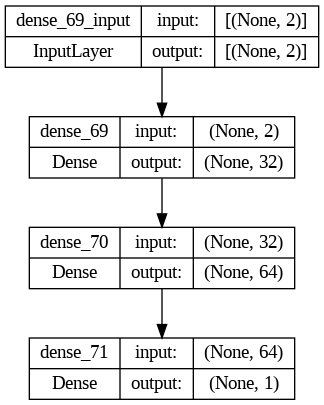

In [36]:
plot_model(model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True)

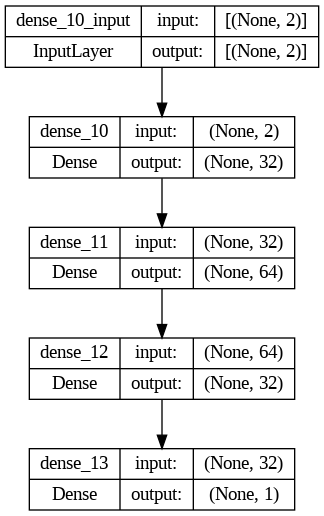

In [37]:
plot_model(model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True)

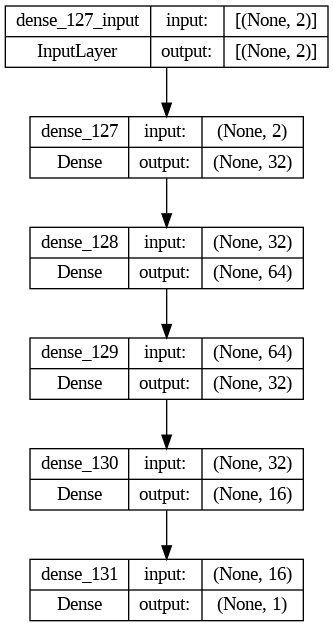

In [38]:
plot_model(model_3, to_file='model_3.png', show_shapes=True, show_layer_names=True)

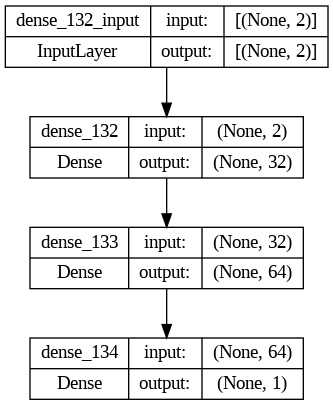

In [39]:
plot_model(model_4, to_file='model_4.png', show_shapes=True, show_layer_names=True)

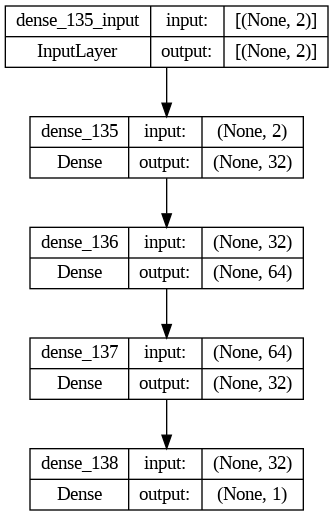

In [40]:
plot_model(model_5, to_file='model_5.png', show_shapes=True, show_layer_names=True)

In [64]:
import numpy as np

#Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

#Derivative of sigmoid function
def deriv_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

#Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))                                                #normalizing to ease the calculation of e^x
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

#Forward propagation
def f_propagation(inputs, inp_weights, out_weights):
    hiddenlayer = np.matmul(inputs, inp_weights)                                                        #calculating the hidden layer
    hiddenlayer_act = sigmoid(hiddenlayer)                                                              #activation function on the hidden layer
    outputlayer = np.matmul(hiddenlayer_act, out_weights)                                               #calculating output layer
    outputlayer_act = softmax(outputlayer)                                                              #softmax on the output layer

    return hiddenlayer_act, outputlayer_act

#Backward propogation
def b_propagation(target, outputlayer_act, out_weights, hiddenlayer_act, inp_weights, inputs, lr):
    total_error_grad = outputlayer_act - target                                                         #gradient of loss function
    outputlayer_act_grad = total_error_grad * outputlayer_act*(1-outputlayer_act)                       #gradient of softmax
    out_weights -= lr * np.matmul(hiddenlayer_act.T, outputlayer_act_grad)                              #Updating weights
    out_grad = np.matmul(hiddenlayer_act.T, outputlayer_act_grad)

    hiddenlayer_grad = np.matmul(outputlayer_act_grad, out_weights.T)                                   #gradient of output layer input
    hiddenlayer_act_grad = hiddenlayer_grad * deriv_sigmoid(hiddenlayer_act)                            #gradient of sigmoid of hidden layer
    inp_weights -= lr * np.matmul(inputs.T, hiddenlayer_act_grad)                                       #updating weights
    in_grad = np.matmul(inputs.T, hiddenlayer_act_grad)

    return inp_weights, out_weights, out_grad, in_grad


inputs = np.array([[0.2, 0.5], [0.1, 0.785], [0.9, 0.9], [0.653, 0.4]])                                                                             #initializing input
target = np.array([[0,0], [0,1], [1,0], [1,1]])                                                                        #initializing output
inp_weights = np.random.randn(2,10)                                                                      #initializing random weights
out_weights = np.random.randn(10,2)
lr = 0.1                                                                                                #learning rate                                                                                         #delta for calculating numerical gradient

for i in range(1000):                                                                                   #1000 iterations

    #running the model
    hiddenlayer_act, outputlayer_act = f_propagation(inputs, inp_weights, out_weights)
    inp_weights, out_weights, out_grad, in_grad = b_propagation(target, outputlayer_act, out_weights, hiddenlayer_act, inp_weights, inputs, lr)

    #for every 100 iterations, print cross entropy loss
    if (i % 100 == 0):

        print('\n')
        loss = - np.sum(target * np.log(outputlayer_act))
        print(" Cross Entropy Loss :", loss)

        print(outputlayer_act)

        predicted_labels = (outputlayer_act > 0.5).astype(int)
        accuracy = np.mean(predicted_labels == target) * 100
        print(f"Accuracy: {accuracy}%")















 Cross Entropy Loss : 5.9472751131713615
[[0.93642212 0.06357788]
 [0.93369171 0.06630829]
 [0.96830413 0.03169587]
 [0.95749755 0.04250245]]
Accuracy: 50.0%


 Cross Entropy Loss : 2.416598544988116
[[0.44748331 0.55251669]
 [0.37607786 0.62392214]
 [0.61200986 0.38799014]
 [0.62780403 0.37219597]]
Accuracy: 75.0%


 Cross Entropy Loss : 2.2780513919719274
[[0.3974764  0.6025236 ]
 [0.31174122 0.68825878]
 [0.6760931  0.3239069 ]
 [0.6725103  0.3274897 ]]
Accuracy: 75.0%


 Cross Entropy Loss : 2.1840168216026594
[[0.35426095 0.64573905]
 [0.26116635 0.73883365]
 [0.73156668 0.26843332]
 [0.70420144 0.29579856]]
Accuracy: 75.0%


 Cross Entropy Loss : 2.1209369804283
[[0.32014556 0.67985444]
 [0.22409483 0.77590517]
 [0.77517605 0.22482395]
 [0.72499073 0.27500927]]
Accuracy: 75.0%


 Cross Entropy Loss : 2.0755630661831668
[[0.29485547 0.70514453]
 [0.19814639 0.80185361]
 [0.80804945 0.19195055]
 [0.73734033 0.26265967]]
Accuracy: 75.0%


 Cross Entropy Loss : 2.0384783750668927
[